# HomeWork 8

**DeadLine : 23:59 29 Aban 1399**

**Total points : 100 pts**

Import some prerequisites.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
import os

Run this cell for plotting.

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 2

Here is for your helper functions (optional).

Implement this function to create panorama image fron two input images.

In [3]:
def stitch(image1, image2):
    '''
    Creates panorama image of two inputs.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result panorama image.
    '''
    
    out_img = None
    
    #Write your code here
    stitcher = cv2.Stitcher_create()
    status, out_img = stitcher.stitch([image1,image2])
    
    return out_img

Test your implementation (dont change this cell)

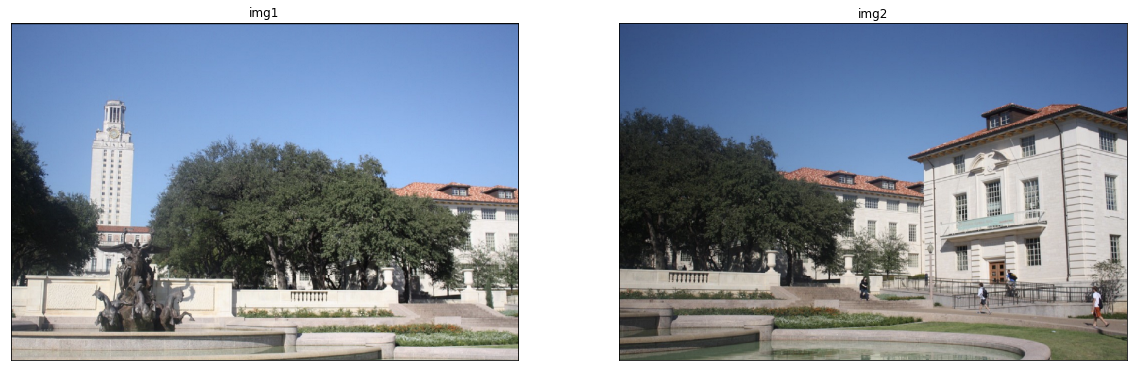

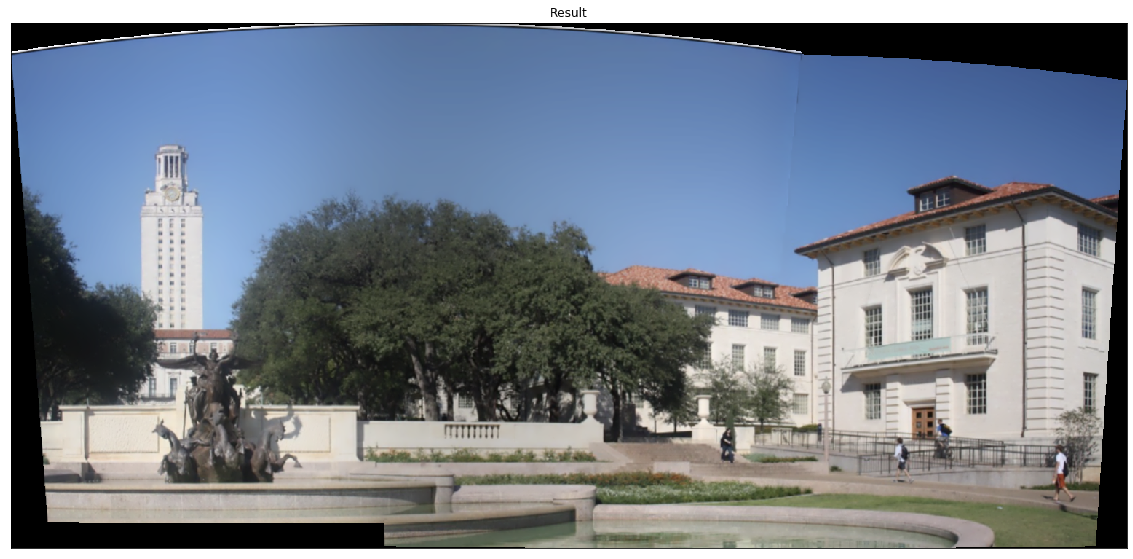

In [4]:
image_list = []

image1 = cv2.imread(os.path.join('images', '2a.png'))
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image_list.append([image1, 'img1', 'img'])

image2 = cv2.imread(os.path.join('images', '2b.png'))
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image_list.append([image2, 'img2', 'img'])

plotter(image_list, 1, 2, True, 20, 10, '2_1')

image_list = []
image_list.append([stitch(image1,image2), 'Result', 'img'])

plotter(image_list, 1, 1, True, 20, 10, '2_2')

# PART 3

Here is for your helper functions (optional).

In [3]:
def rect_to_bb(rect):
	x = rect.left()
	y = rect.top()
	w = rect.right() - x
	h = rect.bottom() - y
	return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
	coords = np.zeros((68, 2), dtype=dtype)
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	return coords

Implement this function to create result image with added mask.

In [4]:
def put_mask(face, mask):
    '''
    Adds mask image on face image.
    
    Parameters:
        face (numpy.ndarray): face image.
        mask (numpy.ndarray): mask image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    result = face.copy()
    result = result.astype(np.float32)
    result = result / 255.0
    
    detector = dlib.get_frontal_face_detector()
    gray_andrew = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
    rects = detector(gray_andrew, 1)
    
    shape = predictor(gray_andrew, rects[0])
    shape = shape_to_np(shape)
    
    h, w, c = mask.shape
    hf,wf,cf = face.shape
    dst = np.array([shape[15],
                   shape[14],
                   shape[12],
                    shape[11],
                    shape[10],
                   shape[8],
                    shape[6],
                    shape[5],
                    shape[4],
                    shape[2],
                    shape[1],
                    shape[30],
                   ], dtype = "float32")
    
    with open("mask.csv") as csv_file:
        import csv
        csv_reader = csv.reader(csv_file, delimiter=",")
        src = []
        for i, row in enumerate(csv_reader):
            try:
                src.append(np.array([float(row[1]), float(row[2])]))
            except ValueError:
                continue
    src = np.array(src, dtype="float32")
    
    M, _ = cv2.findHomography(src, dst)
    transformed_mask = cv2.warpPerspective(
        mask,
        M,
        (result.shape[1], result.shape[0]),
        None,
        cv2.INTER_LINEAR,
        cv2.BORDER_CONSTANT,)
    alpha_mask = transformed_mask[:, :, 3]
    alpha_image = 1.0 - alpha_mask
    for c in range(0, 3):
        result[:, :, c] = (
            alpha_mask * transformed_mask[:, :, c]
            + alpha_image * result[:, :, c])
    return result

Test your implementation (dont change this cell)

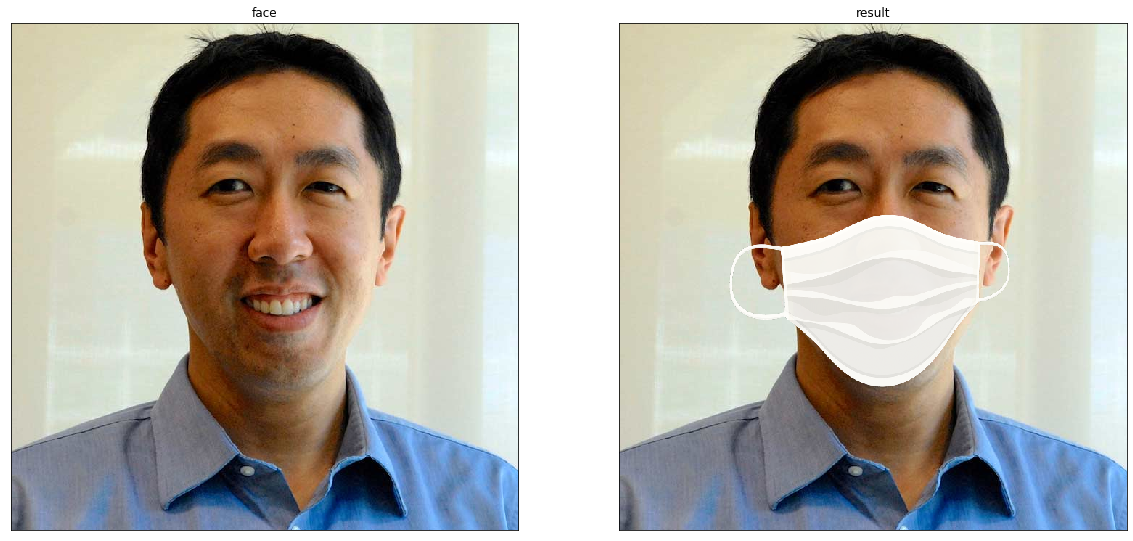

In [5]:
image_list = []

face = cv2.imread(os.path.join('images', 'face.jpg'))
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
image_list.append([face, 'face', 'img'])

mask = cv2.imread(os.path.join('images', 'mask.jpg'), cv2.IMREAD_UNCHANGED)
mask = mask.astype(np.float32)/255

image_list.append([put_mask(face, mask), 'result', 'img'])

plotter(image_list, 1, 2, True, 20, 10, '3')

for create proper files for sending in quera run this cell.

In [61]:
!python notebook_converter.py

End!!!